# ChIP-Seq Peaks analysis
* Donor6
* Donor7
* Donor8

### Bowtie logs analysis

In [1]:
import os
import pandas as pd
import re

def bowtie_logs(folder):
    """Process bowtie logs processed by batch task"""
    # Here we rely on bowtie output
    READS = '.*reads processed: '
    REPORTED_ALIGNMENT = '.*reported alignment: '
    FAILED_TO_ALIGN = '.*failed to align: '
    SUPRESSED = '.*due to -m: '
    print('Processing bowtie logs', folder)
    df = pd.DataFrame(columns=['sample', 'reads', 'aligned', 'not_aligned', 'supressed'])
    for dirpath, dirs, files in os.walk(folder):
            for f in files:
                if ('bowtie' not in f or not re.search('.log$', f)):
                    continue
                reads = ''
                aligned = ''
                failed_to_align = ''
                supressed = ''
                for line in open(dirpath + '/' + f, 'r'):
                    if re.search(READS, line):
                         reads = re.sub(READS, '', line).strip()
                    if re.search(REPORTED_ALIGNMENT, line):
                         aligned = re.sub(REPORTED_ALIGNMENT, '', line).strip()
                    if re.search(FAILED_TO_ALIGN, line):
                        failed_to_align = re.sub(FAILED_TO_ALIGN, '', line).strip()
                    if re.search(SUPRESSED, line):
                         supressed = re.sub(SUPRESSED, '', line).strip()
                df.loc[len(df)] = (f, reads, aligned, failed_to_align, supressed)
    return df

# BOWTIE_LOGS = '/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams'
# bowtie_logs(BOWTIE_LOGS).to_csv(BOWTIE_LOGS + '/bowtie_report.csv', index=False)
BOWTIE_LOGS = '/mnt/washu/artyomov_lab_aging/roadmap_bams/'
bowtie_logs(BOWTIE_LOGS).to_csv(BOWTIE_LOGS + '/bowtie_report.csv', index=False)

Processing bowtie logs /mnt/washu/artyomov_lab_aging/roadmap_bams/


### MACS2 logs

In [2]:
def macs2_logs(folder):
    """Process macs2 logs processed by batch task"""
    # Here we rely on macs2 output
    TAGS = '.*total tags in treatment:'
    REDUNDANT_RATE = '.*Redundant rate of treatment:'
    PAIRED_PEAKS = '.*paired peaks:'
    PREDICTED_FRAGMENT = '.*predicted fragment length is'
    ALTERNATIVE_FRAGMENTS = '.*alternative fragment length\(s\) may be'
    print('Processing macs2 logs', folder)
    df = pd.DataFrame(columns=['sample', 'tags', 'redundant_rate', 'peaks', 'fragment', 'alternatives'])
    for dirpath, dirs, files in os.walk(folder):
            for f in files:
                if ('macs' not in f or not re.search('.log$', f)):
                    continue
                tags = ''
                rr = ''
                peaks = ''
                fragment = ''
                alt_fragments = ''
                for line in open(dirpath + '/' + f, 'r'):
                    if re.search(TAGS, line):
                         tags = re.sub(TAGS, '', line).strip()
                    if re.search(REDUNDANT_RATE, line):
                         rr = re.sub(REDUNDANT_RATE, '', line).strip()
                    if re.search(PAIRED_PEAKS, line):
                         peaks = re.sub(PAIRED_PEAKS, '', line).strip()
                    if re.search(PREDICTED_FRAGMENT, line):
                         fragment = re.sub(PREDICTED_FRAGMENT, '', line).replace('bps', '').strip()
                    if re.search(ALTERNATIVE_FRAGMENTS, line):
                         alt_fragments = re.sub(ALTERNATIVE_FRAGMENTS, '', line).replace('bps', '').strip()

                df.loc[len(df)] = (f, tags, rr, peaks, fragment, alt_fragments)
    return df

# MACS_LOGS = '/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_macs_0.01'
# macs2_logs(MACS_LOGS).to_csv(MACS_LOGS + '/macs2_report.csv', index=False)
MACS_LOGS = '/mnt/washu/artyomov_lab_aging/roadmap_bams_subsampled_macs_0.01/'
macs2_logs(MACS_LOGS).to_csv(MACS_LOGS + '/macs2_report.csv', index=False)

Processing macs2 logs /mnt/washu/artyomov_lab_aging/roadmap_bams_subsampled_macs_0.01/


### Peaks intersection

In [30]:
%matplotlib inline
import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

def processvenn3(file):
    df = pd.read_csv(file, sep='\t')
    donor6 = df.columns[5]
    donor7 = df.columns[6]
    donor8 = df.columns[7]
    fig = plt.figure(figsize=(4, 4))
    # (Abc, aBc, ABc, abC, AbC, aBC, ABC)
    Abc = len(df[df.list == '1'])
    aBc = len(df[df.list == '2'])
    ABc = len(df[df.list == '1,2'])
    abC = len(df[df.list == '3'])
    AbC = len(df[df.list == '1,3'])
    aBC = len(df[df.list == '2,3'])
    ABC = len(df[df.list == '1,2,3'])
    venn3(subsets = (Abc, aBc, ABc, abC, AbC, aBC, ABC), set_labels = (donor6, donor7, donor8))
    plt.show()

# MACS 0.1
Please ensure that you have created intersection data by calling
```
multiIntersectBed -header -i *k27ac*.bed > k27ac.csv
multiIntersectBed -header -i *k4me3*.bed > k4me3.csv
multiIntersectBed -header -i *k27me3*.bed > k27me3.csv
```



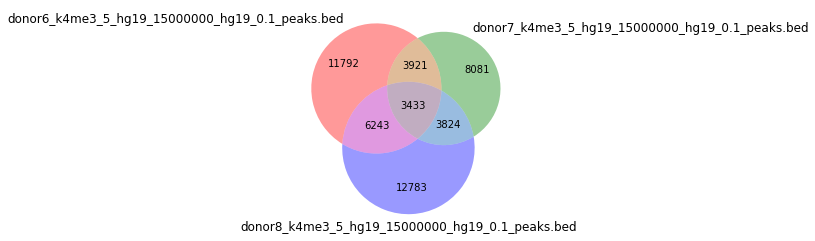

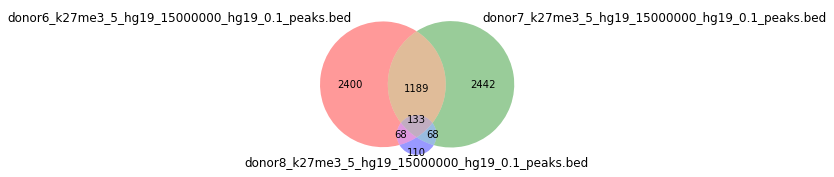

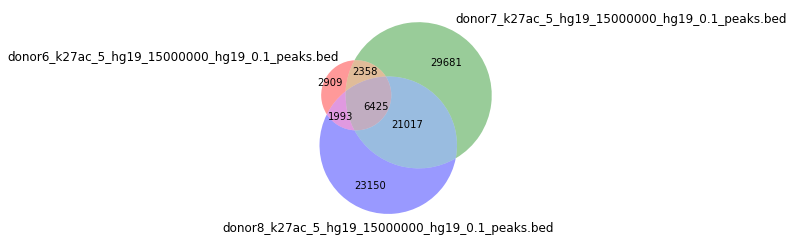

In [31]:
processvenn3('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_macs_0.1/k4me3.csv')
processvenn3('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_macs_0.1/k27me3.csv')
processvenn3('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_macs_0.1/k27ac.csv')

# MACS2 0.01

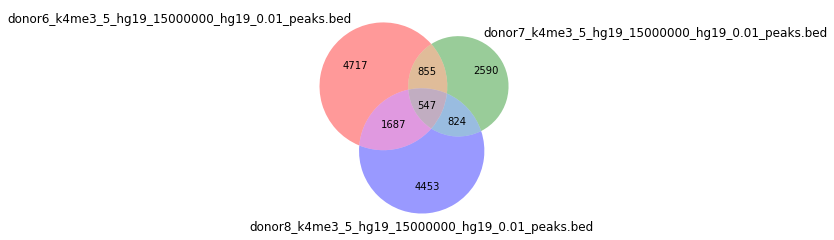

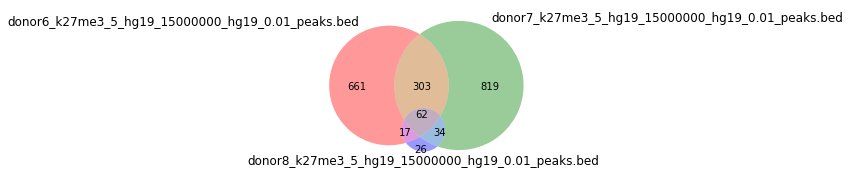

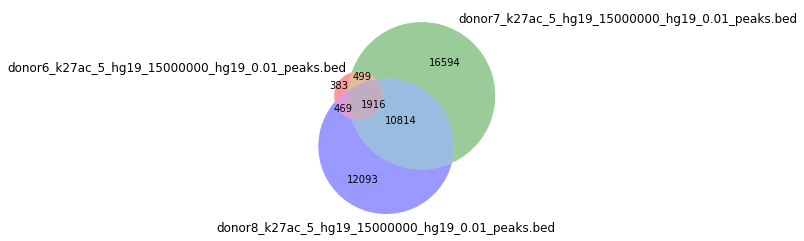

In [32]:
processvenn3('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_macs_0.01/k4me3.csv')
processvenn3('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_macs_0.01/k27me3.csv')
processvenn3('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_macs_0.01/k27ac.csv')

# Zinbra 0.0001

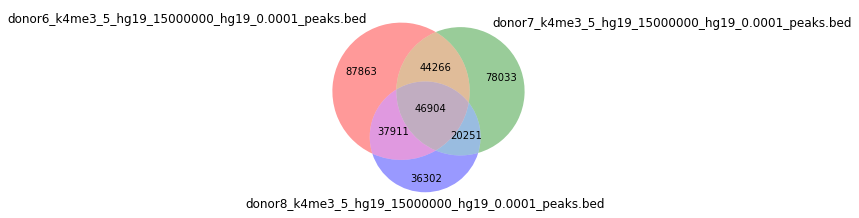

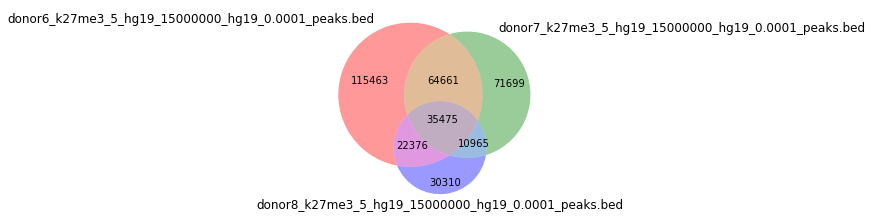

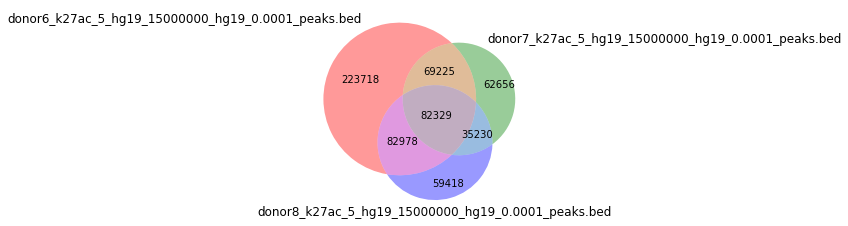

In [34]:
processvenn3('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_zinbra_0.0001/k4me3.csv')
processvenn3('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_zinbra_0.0001/k27me3.csv')
processvenn3('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_zinbra_0.0001/k27ac.csv')

# Roadmap Macs2
```
# H3K4me3
wget -r -nc ftp://ftp-trace.ncbi.nlm.nih.gov/sra/sra-instant/reads/ByExp/sra/SRX/SRX252/SRX252734

# H3K27me3
wget -r -nc ftp://ftp-trace.ncbi.nlm.nih.gov/sra/sra-instant/reads/ByExp/sra/SRX/SRX252/SRX252722

# H3K27ac
wget -r -nc ftp://ftp-trace.ncbi.nlm.nih.gov/sra/sra-instant/reads/ByExp/sra/SRX/SRX252/SRX252719

find . -name "*.sra" | xargs -i mv {} .
SRR787528_k27me3.sra
SRR787515_k4me3.sra
SRR787516_k4me3.sra
SRR787551_k27ac.sra
SRR787552_k27ac.sra
```

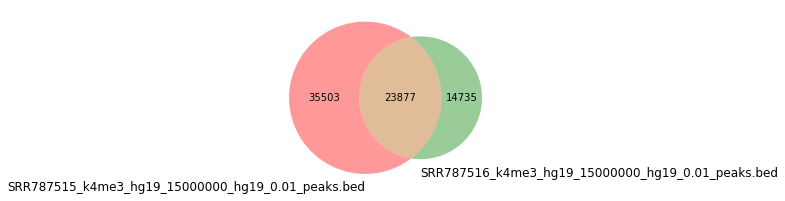

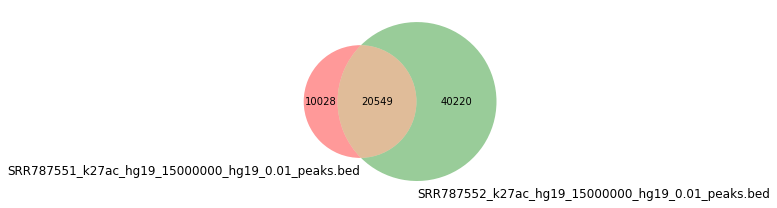

In [4]:
%matplotlib inline
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

def processvenn2(file):
    df = pd.read_csv(file, sep='\t')
    sample1 = df.columns[5]
    sample2 = df.columns[6]
    fig = plt.figure(figsize=(4, 4))
    # (Ab, aB, AB)
    Ab = len(df[df.list == '1'])
    aB = len(df[df.list == '2'])
    AB = len(df[df.list == '1,2'])
    venn2(subsets = (Ab, aB, AB), set_labels = (sample1, sample2))
    plt.show()
    
processvenn2('/mnt/washu/artyomov_lab_aging/roadmap_bams_subsampled_macs_0.01/k4me3.csv')
processvenn2('/mnt/washu/artyomov_lab_aging/roadmap_bams_subsampled_macs_0.01/k27ac.csv')

# Roadmap vs run6,7,8 Q=0.01
```
# Merge run6,7,8 peaks
cd run_6_run_7_trim_bams_subsampled_macs_0.01
bedtools merge -i donor6_k27me3_5_hg19_15000000_hg19_0.01_peaks.bed -i donor7_k27me3_5_hg19_15000000_hg19_0.01_peaks.bed -i donor8_k27me3_5_hg19_15000000_hg19_0.01_peaks.bed > merge_k27me3.bed

bedtools merge -i donor6_k27ac_5_hg19_15000000_hg19_0.01_peaks.bed -i donor7_k27ac_5_hg19_15000000_hg19_0.01_peaks.bed -i donor8_k27ac_5_hg19_15000000_hg19_0.01_peaks.bed > merge_k27ac.bed

bedtools merge -i donor6_k4me3_5_hg19_15000000_hg19_0.01_peaks.bed -i donor7_k4me3_5_hg19_15000000_hg19_0.01_peaks.bed -i donor8_k27me3_5_hg19_15000000_hg19_0.01_peaks.bed > merge_k4me3.bed
cd ..


# Merge roadmap peaks
cd roadmap_bams_subsampled_macs_0.01/
bedtools merge -i SRR787515_k4me3_hg19_15000000_hg19_0.01_peaks.bed -i SRR787516_k4me3_hg19_15000000_hg19_0.01_peaks.bed > merge_k4me3.bed

bedtools merge -i SRR787551_k27ac_hg19_15000000_hg19_0.01_peaks.bed -i SRR787552_k27ac_hg19_15000000_hg19_0.01_peaks.bed > merge_k27ac.bed
cd ..

mkdir roadmap_run678
cd roadmap_run678

multiIntersectBed -header -i ../run_6_run_7_trim_bams_subsampled_macs_0.01/merge_k27ac.bed ../roadmap_bams_subsampled_macs_0.01/merge_k27ac.bed > k27ac.csv

multiIntersectBed -header -i ../run_6_run_7_trim_bams_subsampled_macs_0.01/merge_k4me3.bed ../roadmap_bams_subsampled_macs_0.01/merge_k4me3.bed > k4me3.csv

multiIntersectBed -header -i ../run_6_run_7_trim_bams_subsampled_macs_0.01/merge_k27me3.bed ../roadmap_bams_subsampled_macs_0.01/SRR787528_k27me3_hg19_15000000_hg19_0.01_peaks.bed > k27me3.csv

```

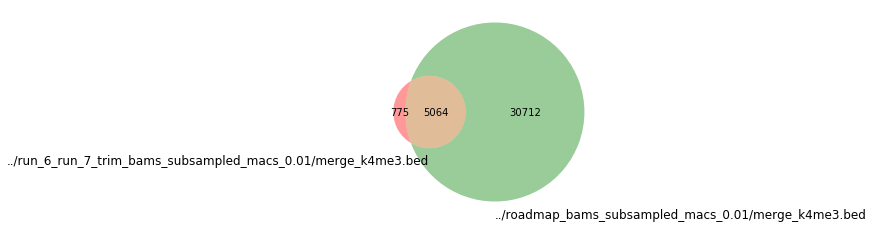

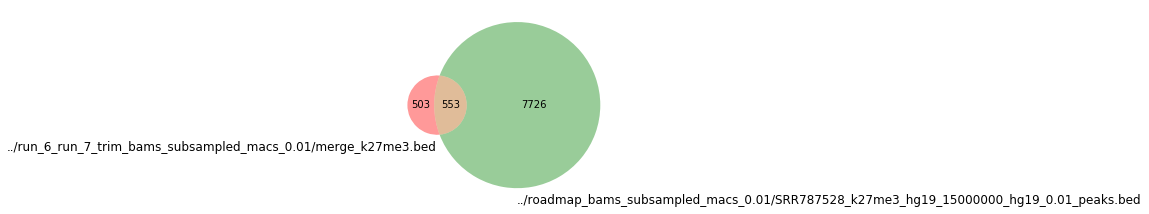

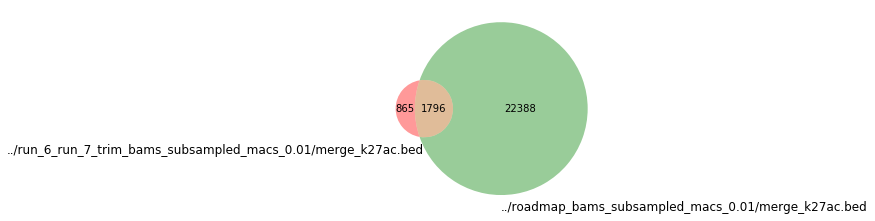

In [7]:
processvenn2('/mnt/washu/artyomov_lab_aging/roadmap_run678/k4me3.csv')
processvenn2('/mnt/washu/artyomov_lab_aging/roadmap_run678/k27me3.csv')
processvenn2('/mnt/washu/artyomov_lab_aging/roadmap_run678/k27ac.csv')